In [61]:
## To widen the window
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% } </style>"))

In [165]:
import networkx as nx
#from matplotlib import *
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
%matplotlib inline
import igraph as ig 
from __future__ import division
import numpy as np
import itertools as it
import reverse_geocoder as rg
import mpl_toolkits.basemap as bm
import time
from datetime import datetime
# import multiprocessing 
import joblib as jb
from timezonefinder import TimezoneFinder
import pytz


# from geopy.geocoders import Nominatim
# import pycountry ## NOt installed yet 


In [4]:
rootdir=os.getcwd()

europ  =['AL', 'AD', 'AM', 'AT', 'BY', 'BE', 'BA', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FO', 'FI',
         'FR', 'GB', 'GE', 'GI', 'GR', 'HU', 'HR','IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MC', 'MK', 'MT', 'NO', 
         'NL', 'PO', 'PT', 'RO', 'RU', 'SE', 'SI', 'SK', 'SM', 'TR', 'UA', 'VA']

collection='all'

# dataset_list = ['organDonation', 'g_20','rioSports', 'rioTerms', 'wwc2015','randSamples']

file_name=rootdir+'/data/'+collection+'.hdf'
df_info = pd.read_hdf(file_name, key='df_info')
df_info.head(5)

,coordinate,countryCode,created_at,emoji_List,emoji_index_in_Net,emoji_position_in_text,hashtags,in_reply_to_user,sentiment,tweet_ID,tweet_Time,tweet_lang,user_ID,user_Location,user_mention,words
0,0,0,Sat Feb 20 12:22:31 +0000 2016,"[\U00002764, \U00002764]",[1171],"[112, 114]",[0],0,0.52500,701019095320420352,1455970951286,en,3.393506e+08,TX ✈️ IL,[],"[(first, 0), (day, 6), (since, 10), (years, 18..."
1,0,0,Sat Feb 20 12:40:16 +0000 2016,[\U0001F49E],[],[114],[0],0,-0.18125,701023563105472512,1455972016489,en,1.580986e+08,aus,[],"[(big, 8), (brothers, 12), (heart, 25), (birth..."
2,0,0,Sat Feb 20 12:52:43 +0000 2016,[\U0001F609],[],[58],[0],0,0.80000,701026696057622528,1455972763443,en,2.509437e+08,Singapore,[],"[(organ, 7), (donor, 13), (happy, 31), (give, ..."
3,0,0,Sat Feb 20 13:59:42 +0000 2016,[\U0001F601],[],[38],[0],0,0.00000,701043554114646019,1455976782717,en,1.016425e+09,"Branchville, South Carolina",[],"[(time, 0), (heart, 11), (transplant, 17)]"
4,0,0,Sat Feb 20 14:07:33 +0000 2016,"[\U0001F64F, \U0001F64F\U0001F3FB]","[1047, 960]","[26, 26]",[0],0,0.00000,701045529606750208,1455977253711,en,2.844745e+09,"Glasgow, Scotland",[],"[(became, 5), (organ, 15), (donor, 21)]"


In [12]:
count=1
coordinates = list()
lats = []
lons = []

for group in sorted(df_info.groupby(by='coordinate')):
#     print group[0], len(group[1])/float(len(df_info))
    if len(group[1])<2:
        temp_list = group[0].split()
        ### Puring the coordinates from '[' and ','
        tuple_0 = temp_list[0].replace('[','')
        tuple_0 = tuple_0.replace(',','')
        tuple_0=float(tuple_0)
        lats.append(tuple_0)
        
        tuple_1 = temp_list[1].replace(']','')
        tuple_1 = float(tuple_1)
        lons.append(tuple_1)

        coordinates.append( (tuple_0, tuple_1) )
#     count +=1
#     if count>10:
#         break

/Users/mehdimac/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/mehdimac/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/mehdimac/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mehdimac/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


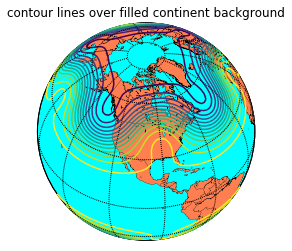

In [8]:
map = bm.Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()


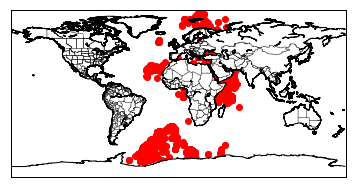

In [39]:
m = bm.Basemap(
#             projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# m.drawmapboundary(fill_color='#46bcec')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color = 'white',lake_color='white')
m.scatter(lons, lats, marker = 'o', color='r')
plt.savefig('results/geo_diff/world_scatter.pdf')
plt.show()

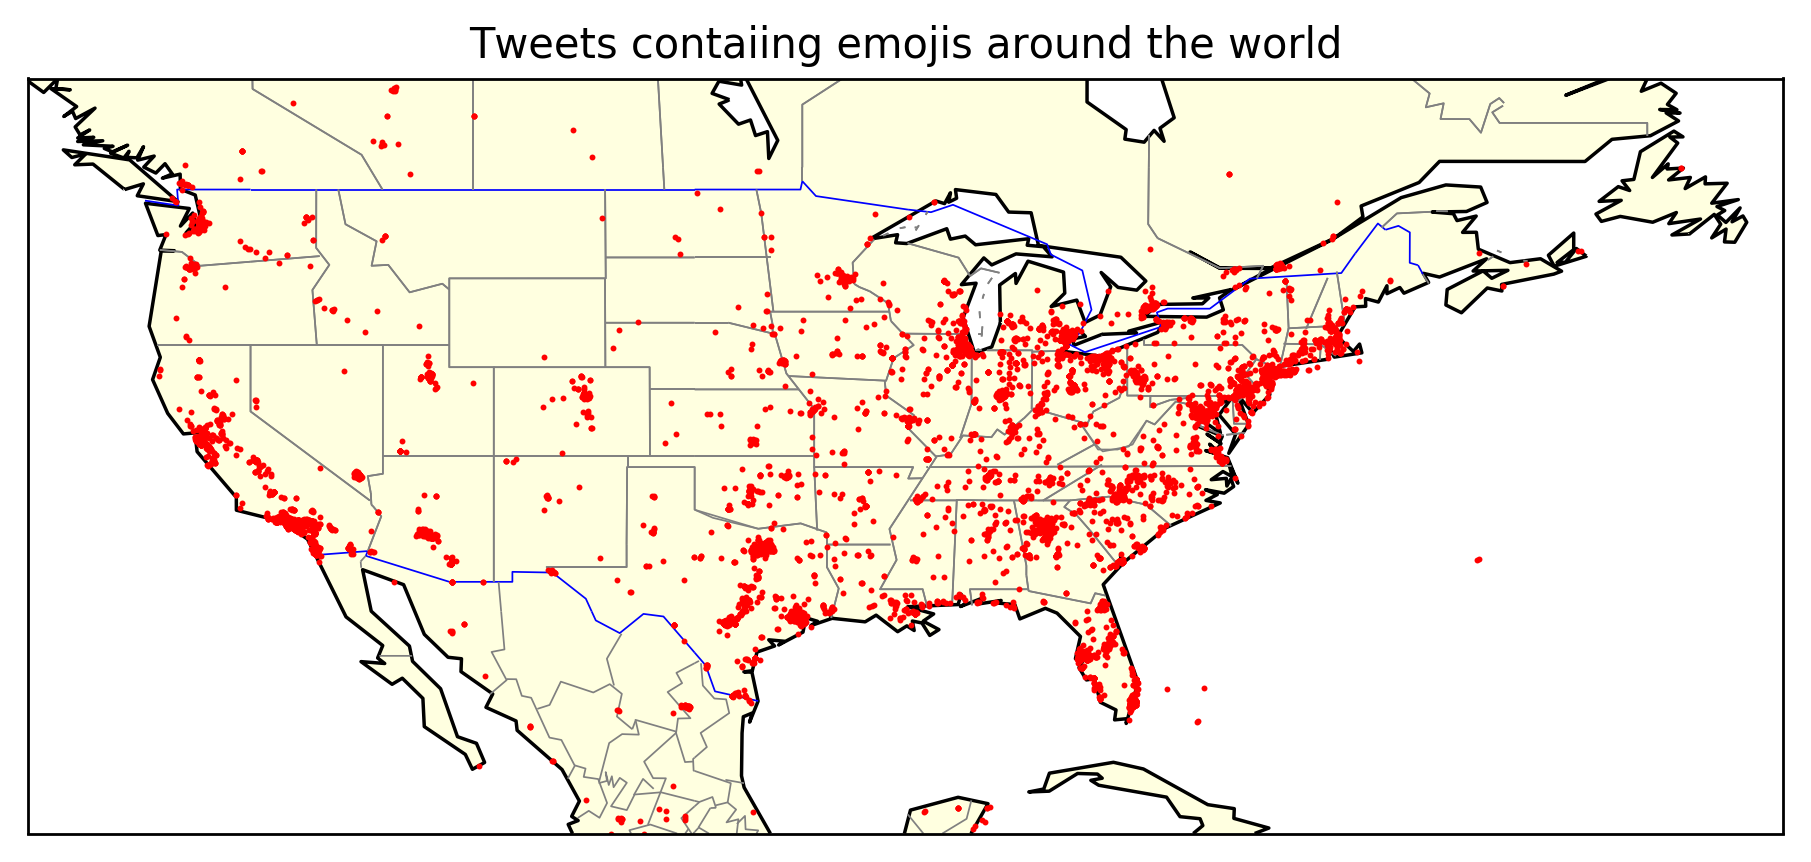

In [102]:
# Size of the map
fig = plt.figure(figsize=(18, 4), dpi=250)

# Set a title
plt.title("Tweets contaiing emojis around the world")

# Declare map projection, size and resolution
# map = bm.Basemap(
#     projection='merc',
#               llcrnrlat=-80,
#               urcrnrlat=80,
#               llcrnrlon=-180,
#               urcrnrlon=180,
#               lat_ts=20,
#               resolution='l')

# map.bluemarble(scale=0.3)

## South America
# m=Basemap(llcrnrlon=-100, llcrnrlat=-58,urcrnrlon=-30,urcrnrlat=15)

## USA
map=bm.Basemap(llcrnrlon=-130, llcrnrlat=20,urcrnrlon=-51,urcrnrlat=54)


map.drawcoastlines()
map.drawcountries(color='blue')
map.fillcontinents(color='#ffffe0')
map.drawstates(color='gray')

for c in coordinates:
    x, y = map(c[0], c[1])
    map.plot(x, y, 'ro', markersize=0.7)
plt.draw()

plt.savefig('results/geo_diff/world_scatter_USA.pdf')


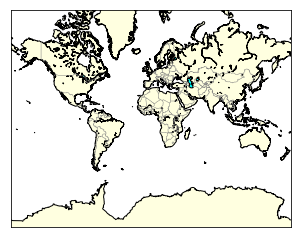

In [60]:
map.drawcoastlines()
map.fillcontinents(color='#ffffe0', lake_color='aqua')

map.drawcountries(color='gray')


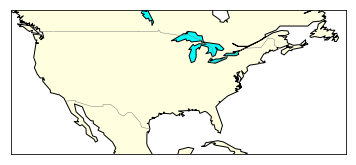

In [99]:
map=bm.Basemap(llcrnrlon=-130, llcrnrlat=20,urcrnrlon=-51,urcrnrlat=54)
map.drawcoastlines()
map.fillcontinents(color='#ffffe0', lake_color='aqua')
map.drawcountries(color='gray')


In [57]:
#import reverse_geocoder as rg

# coordinate = (-0.002828, 51.371696)
# coor_reserve = [(c[1], c[0]) for c in coordinates]
# results = rg.search(coor_reserve) # default mode = 2

# print results

# df1['e'] = pd.Series(str(0), index=df1.index)
# df1[1]['e'] = '2'
df_info = df_info.drop('e', axis = 1)
df_info.head(4)

,coordinate,countryCode,created_at,emoji_List,emoji_index_in_Net,emoji_position_in_text,hashtags,in_reply_to_user,sentiment,tweet_ID,tweet_Time,tweet_lang,user_ID,user_Location,user_mention,words
0,0,0,Sat Feb 20 12:22:31 +0000 2016,"[\U00002764, \U00002764]",[1171],"[112, 114]",[0],0,0.52500,701019095320420352,1455970951286,en,3.393506e+08,TX ✈️ IL,[],"[(first, 0), (day, 6), (since, 10), (years, 18..."
1,0,0,Sat Feb 20 12:40:16 +0000 2016,[\U0001F49E],[],[114],[0],0,-0.18125,701023563105472512,1455972016489,en,1.580986e+08,aus,[],"[(big, 8), (brothers, 12), (heart, 25), (birth..."
2,0,0,Sat Feb 20 12:52:43 +0000 2016,[\U0001F609],[],[58],[0],0,0.80000,701026696057622528,1455972763443,en,2.509437e+08,Singapore,[],"[(organ, 7), (donor, 13), (happy, 31), (give, ..."
3,0,0,Sat Feb 20 13:59:42 +0000 2016,[\U0001F601],[],[38],[0],0,0.00000,701043554114646019,1455976782717,en,1.016425e+09,"Branchville, South Carolina",[],"[(time, 0), (heart, 11), (transplant, 17)]"


In [238]:
## Add a culumn based on others
## functions to extract country based on coordinate

count=1
coordinates = list()
lats = []
lons = []
df_coor = pd.DataFrame()

def coor_2_country(rec):
    if len(rec['coordinate'])<2:
        return 'UNK'
    else:
        temp_list = rec['coordinate'].split()
        ### Puring the coordinates from '[' and ','
        tuple_0 = temp_list[0].replace('[','')
        tuple_0 = tuple_0.replace(',','')
        tuple_0=float(tuple_0)
        lats.append(tuple_0)
        
        tuple_1 = temp_list[1].replace(']','')
        tuple_1 = float(tuple_1)
        lons.append(tuple_1)

        results = rg.search((tuple_1, tuple_0))
        return results[0]['cc']

def coor_str_dict(coor_str):
    results = {'lon':0.0, 'lat':0.0}
    if len(coor_str)<3:
        return {'lat':0.0, 'lon':0.0}
    else:
        temp_list = coor_str.split()
        ### Puring the coordinates from '[' and ','
#         print 'in function'
#         print temp_list
        if len(temp_list)>1:
            tuple_0 = temp_list[0].replace('[','')
            tuple_0 = tuple_0.replace(',','')
            tuple_0=float(tuple_0)
#             print tuple_0
            
            tuple_1 = temp_list[1].replace(']','')
            tuple_1 = float(tuple_1)
            # Longitute and latitute are changed
            results = {'lon':tuple_0, 'lat':tuple_1}
        return results


def coor_2_hour(rec):
    coor_str = str(rec['coordinate'])
    #t_time = rec['tweet_Time']
    t_time = rec['created_at']    
    coor = coor_str_dict(coor_str)
    if coor['lat'] == 0.0:
        return 25
    else:
        tf = TimezoneFinder()
        zone = tf.timezone_at(lng=coor['lon'], lat=coor['lat'])
        if zone is not None:
            timezone = pytz.timezone(zone)
            dt = datetime.fromtimestamp(time.mktime(time.strptime(t_time,'%a %b %d %H:%M:%S +0000 %Y')))
    #         dt= datetime.utcfromtimestamp(t_time/1000)
            local_time = dt.replace(tzinfo=pytz.utc).astimezone(timezone)
        
            return local_time.hour
        else:
            return 25
    

    
def coor_2_state(rec):
    if len(rec['coordinate'])<2:
        return 'UNK'
    else:
        temp_list = rec['coordinate'].split()
        ### Puring the coordinates from '[' and ','
        tuple_0 = temp_list[0].replace('[','')
        tuple_0 = tuple_0.replace(',','')
        tuple_0=float(tuple_0)
        lats.append(tuple_0)
        
        tuple_1 = temp_list[1].replace(']','')
        tuple_1 = float(tuple_1)
        lons.append(tuple_1)

        results = rg.search((tuple_1, tuple_0))
        return results[0]['admin1']
        

In [69]:
# df_info['country_geo'] = df_info.apply(coor_2_country, axis = 1)
df_info.head(4)

,coordinate,countryCode,created_at,emoji_List,emoji_index_in_Net,emoji_position_in_text,hashtags,in_reply_to_user,sentiment,tweet_ID,tweet_Time,tweet_lang,user_ID,user_Location,user_mention,words,country_geo
0,0,0,Sat Feb 20 12:22:31 +0000 2016,"[\U00002764, \U00002764]",[1171],"[112, 114]",[0],0,0.52500,701019095320420352,1455970951286,en,3.393506e+08,TX ✈️ IL,[],"[(first, 0), (day, 6), (since, 10), (years, 18...",UNK
1,0,0,Sat Feb 20 12:40:16 +0000 2016,[\U0001F49E],[],[114],[0],0,-0.18125,701023563105472512,1455972016489,en,1.580986e+08,aus,[],"[(big, 8), (brothers, 12), (heart, 25), (birth...",UNK
2,0,0,Sat Feb 20 12:52:43 +0000 2016,[\U0001F609],[],[58],[0],0,0.80000,701026696057622528,1455972763443,en,2.509437e+08,Singapore,[],"[(organ, 7), (donor, 13), (happy, 31), (give, ...",UNK
3,0,0,Sat Feb 20 13:59:42 +0000 2016,[\U0001F601],[],[38],[0],0,0.00000,701043554114646019,1455976782717,en,1.016425e+09,"Branchville, South Carolina",[],"[(time, 0), (heart, 11), (transplant, 17)]",UNK


In [70]:
# df_info['state_geo'] = df_info.apply(coor_2_state, axis = 1)
df_info.head(4)

,coordinate,countryCode,created_at,emoji_List,emoji_index_in_Net,emoji_position_in_text,hashtags,in_reply_to_user,sentiment,tweet_ID,tweet_Time,tweet_lang,user_ID,user_Location,user_mention,words,country_geo,state_geo
0,0,0,Sat Feb 20 12:22:31 +0000 2016,"[\U00002764, \U00002764]",[1171],"[112, 114]",[0],0,0.52500,701019095320420352,1455970951286,en,3.393506e+08,TX ✈️ IL,[],"[(first, 0), (day, 6), (since, 10), (years, 18...",UNK,UNK
1,0,0,Sat Feb 20 12:40:16 +0000 2016,[\U0001F49E],[],[114],[0],0,-0.18125,701023563105472512,1455972016489,en,1.580986e+08,aus,[],"[(big, 8), (brothers, 12), (heart, 25), (birth...",UNK,UNK
2,0,0,Sat Feb 20 12:52:43 +0000 2016,[\U0001F609],[],[58],[0],0,0.80000,701026696057622528,1455972763443,en,2.509437e+08,Singapore,[],"[(organ, 7), (donor, 13), (happy, 31), (give, ...",UNK,UNK
3,0,0,Sat Feb 20 13:59:42 +0000 2016,[\U0001F601],[],[38],[0],0,0.00000,701043554114646019,1455976782717,en,1.016425e+09,"Branchville, South Carolina",[],"[(time, 0), (heart, 11), (transplant, 17)]",UNK,UNK


In [107]:
# df_info.to_hdf('results/cultural_diff/all_geo.hdf', key='df_info', mode='w') 
# df_info = pd.read_hdf('results/cultural_diff/all_geo.hdf', key='df_info')
df_info = pd.read_csv('data/correct_shit.csv')

/Users/mehdimac/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,11,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [252]:
def update_adj_matrix(old_matrix, matIndex, textIndex):
    for k in range(len(matIndex)):
        for j in range(k+1,len(matIndex)):## It does not count the emoji itself, it counts the self edges
            if textIndex[k]<textIndex[j]:
                #print 'link updated: ', matIndex[k], ' --> ', matIndex[j]
                old_matrix[matIndex[k], matIndex[j]] += 1
            else:
                #print 'link updated: ', matIndex[j], ' --> ', matIndex[k]
                old_matrix[matIndex[j], matIndex[k]] += 1
    return old_matrix

def create_emoji_List(emoji_file):
        ####  Read the list of emojis from a file and turn it to a list
        #emojiList00=text_2_list(emojiListFile)## '\U0000002A\U0000FE0F\U000020E3' is deleted from this text, BE CAREFUL!!!
        mylist=[]
        with open(emoji_file, 'r') as f:
            for line in f:
                mylist.append(line)
        emojiList00 = [x for x in mylist if x != u'\U0000002A\U0000FE0F\U000020E3']
        emojiList00.remove('\U0000002A\U0000FE0F\U000020E3')
        emojiList00=[emoji.replace('\n','') for emoji in emojiList00]
        return emojiList00

## A function to extract the list of categories
def list_of_cat(emoji_info_file):
    f=open(emoji_info_file)
    lines=f.readlines()
    emoji_cat_list=[]
    for line in lines:
        line=line.strip()
        l=line.split(",")
        emoji_cat_list.append(l[2]) # The 3rd column in the name of communities
    emoji_cat_list.pop(0)
    return emoji_cat_list

## A function to extract the list of emojis index in the adj matrx
def list_of_emoji(emoji_info_file):
    f=open(emoji_info_file)
    lines=f.readlines()
    emoji_list=[]
    for line in lines:
        line=line.strip()
        l=line.split(",")
        emoji_list.append(l[0]) # The 3rd column in the name of communities
    emoji_list.pop(0)
    return emoji_list

emoji_list = create_emoji_List('emojiList_2300.txt')

def network_builder(group_1, key_based, key_text, out_graphml, emoji_list, tag):
    '''
    This function receives a data frame and it returns the graphml file of the network 
    created based on a key in it. 
    '''
    adjMat = np.zeros((len(emoji_list), len(emoji_list)), dtype = int) # The matrix containing the edges
    ## calculate the adjacency matrix
    counter=0
    for e,p in zip(group_1[1][key_based] , group_1[1][key_text]):
        print e
        mentioned_list=[]
        text_index=[]
        for emoji in e:
            mentioned_list.append(emoji_list.index(emoji))
        if len(mentioned_list)>1:
            adjMat = update_adj_matrix(adjMat, mentioned_list, p)
    ## create the network
    net = nx.from_numpy_matrix(adjMat, create_using=nx.DiGraph())
    net.edges(data=True)
    nx.write_graphml(net, 'results/cultural_diff/temp_{}.graphml'.format(tag))
    
#     np.savetxt('temp.txt', adjMat, fmt='%.18e', delimiter=',', newline='\n', header='')
#     g = ig.Graph.Read('temp.txt')
    g = ig.Graph.Read_GraphML('results/cultural_diff/temp_{}.graphml'.format(tag))
    g.vs['index'] = list(range(len(emoji_list)))
    g.vs['category'] = list_of_cat('all_emoji.csv')
    g.vs['unicode'] = list_of_emoji('all_emoji.csv')
    
    g.write_graphml(out_graphml)
    return g



In [10]:
count_state=[]
state_dict = dict()
count=0
state_31_list = []

for group_c in sorted(df_info.groupby(by='country_geo')):
    if group_c[0] == 'US':
        df_g = pd.DataFrame.from_dict(group_c[1])
        for group_s in sorted(df_g.groupby(by='state_geo')):
            count_state.append(len(group_s[1]))
            state_dict[group_s[0]] = len(group_s[1])
            if len(group_s[1])>50:
                count +=1
                state_31_list.append(group_s[0])
                file_graphml = 'results/cultural_diff/geo_net/{}.graphml'.format(group_s[0])
                print count,file_graphml, len(group_s[1])
                net = network_builder(group_s, 'emoji_List','emoji_position_in_text', \
                                  file_graphml, emoji_list, tag=group_s[0])
        break


1 results/cultural_diff/geo_net/Alabama.graphml 75


NameError: name 'network_builder' is not defined

In [109]:
for item in df_info.columns:
    print item,df_info[item][0]

 coordinate 0
countryCode 0
created_at Sat Feb 20 12:22:31 +0000 2016
emoji_List [\U00002764, \U00002764]
emoji_index_in_Net [1171]
emoji_position_in_text [112, 114]
hashtags [0]
in_reply_to_user 0.0
sentiment 0.525
tweet_ID 7.010190953204204e+17
tweet_Time 1455970951286.0
tweet_lang en
user_ID 339350636.0
user_Location TX ✈️ IL
user_mention []
words [(first, 0), (day, 6), (since, 10), (years, 18), (ago, 24), (wit, 41), (dad, 48), (blessed, 60), (day, 6), (happy, 73), (heart, 79), (transplant, 85), (anniversary, 96), (dad, 48)]
country_geo UNK
state_geo UNK


In [106]:
# df_info.to_csv('data/correct_shit.csv',index=None,encoding='utf-8')

In [234]:
df_info.head(20)

,coordinate,countryCode,created_at,emoji_List,emoji_index_in_Net,emoji_position_in_text,hashtags,in_reply_to_user,sentiment,tweet_ID,tweet_Time,tweet_lang,user_ID,user_Location,user_mention,words,country_geo,state_geo
0,0,0,Sat Feb 20 12:22:31 +0000 2016,"[\U00002764, \U00002764]",[1171],"[112, 114]",[0],0.000000e+00,0.525000,7.010191e+17,1.455971e+12,en,3.393506e+08,TX ✈️ IL,[],"[(first, 0), (day, 6), (since, 10), (years, 18...",UNK,UNK
1,0,0,Sat Feb 20 12:40:16 +0000 2016,[\U0001F49E],[],[114],[0],0.000000e+00,-0.181250,7.010236e+17,1.455972e+12,en,1.580986e+08,aus,[],"[(big, 8), (brothers, 12), (heart, 25), (birth...",UNK,UNK
2,0,0,Sat Feb 20 12:52:43 +0000 2016,[\U0001F609],[],[58],[0],0.000000e+00,0.800000,7.010267e+17,1.455973e+12,en,2.509437e+08,Singapore,[],"[(organ, 7), (donor, 13), (happy, 31), (give, ...",UNK,UNK
3,0,0,Sat Feb 20 13:59:42 +0000 2016,[\U0001F601],[],[38],[0],0.000000e+00,0.000000,7.010436e+17,1.455977e+12,en,1.016425e+09,"Branchville, South Carolina",[],"[(time, 0), (heart, 11), (transplant, 17)]",UNK,UNK
4,0,0,Sat Feb 20 14:07:33 +0000 2016,"[\U0001F64F, \U0001F64F\U0001F3FB]","[1047, 960]","[26, 26]",[0],0.000000e+00,0.000000,7.010455e+17,1.455977e+12,en,2.844745e+09,"Glasgow, Scotland",[],"[(became, 5), (organ, 15), (donor, 21)]",UNK,UNK
5,0,0,Sat Feb 20 14:17:05 +0000 2016,"[\U0001F611, \U0001F611, \U0001F611]","[961, 774, 774]","[78, 79, 80]",[0],4.430847e+08,0.000000,7.010479e+17,1.455978e+12,en,3.811737e+08,Bromsgrove,"[443084695, 376668771]","[(think, 30), (need, 38), (liver, 56), (transp...",UNK,UNK
6,0,0,Sat Feb 20 15:36:09 +0000 2016,[\U00002665],[],[73],[0],0.000000e+00,0.000000,7.010678e+17,1.455983e+12,in,4.891949e+09,CA,[],"[(rss, 32), (f4f, 69)]",UNK,UNK
7,0,0,Sat Feb 20 15:47:42 +0000 2016,"[\U0001F64F, \U0001F64F, \U0001F493, \U0001F49...","[1309, 960, 960, 1172, 1174]","[44, 120, 119, 42, 43]",[0],2.294787e+09,-0.125000,7.010707e+17,1.455983e+12,en,2.294787e+09,0,[],"[(donate, 15), (small, 46), (big, 55), (amount...",UNK,UNK
8,0,0,Sat Feb 20 15:52:29 +0000 2016,"[\U0001F602, \U0001F602]","[1809, 1048]","[0, 1]",[0],0.000000e+00,0.000000,7.010719e+17,1.455984e+12,en,2.551113e+08,Huntsville ✈ T-Town,[],"[(ayyyyy, 3), (turn, 10)]",UNK,UNK
9,0,0,Sat Feb 20 15:53:39 +0000 2016,[\U0000263A],[],[74],[0],0.000000e+00,0.800000,7.010722e+17,1.455984e+12,en,4.111999e+09,kuala lumpur .,[2971014870],"[(organ, 24), (donor, 30), (id, 40), (happy, 4...",UNK,UNK


In [224]:
for i in range(10, 20):
    print i
    temp = df_info['created_at'][i]
    print temp
    print type(time.strptime(temp,'%a %b %d %H:%M:%S +0000 %Y'))
#     digit = len(str(i))
#     temp = temp.to_string()[5+digit-1:18+digit-1]
#     print i,temp
#     print temp.to_string()
#     temp_2 = pd.to_datetime(df_info['tweet_Time'][i])
#     print type(temp_2)
#     dt= datetime.utcfromtimestamp( int(float(temp)/1000))
#     dt= datetime.strftime('%Y-%m-%d %H:%M:%S', time.strptime(temp,'%a %b %d %H:%M:%S +0000 %Y'))
#     ts = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(temp,'%a %b %d %H:%M:%S +0000 %Y'))
    dt = datetime.fromtimestamp(time.mktime(time.strptime(temp,'%a %b %d %H:%M:%S +0000 %Y')))

    
#     coor = coor_str_dict(df_info['coordinate'][i])
#     if coor['lat']!=0:
#         print coor
#     print coor_2_hour_test(df_info['coordinate'][i], df_info['tweet_Time'][i])
#     print df_info['created_at'][i]
#     print temp
    print ts
    print i, dt.hour
    print '-------------------------------------'

10
Sat Feb 20 16:00:23 +0000 2016
<type 'time.struct_time'>
2016-02-20 17:25:23
10 16
-------------------------------------
11
Sat Feb 20 15:54:13 +0000 2016
<type 'time.struct_time'>
2016-02-20 17:25:23
11 15
-------------------------------------
12
Sat Feb 20 16:10:40 +0000 2016
<type 'time.struct_time'>
2016-02-20 17:25:23
12 16
-------------------------------------
13
Sat Feb 20 16:16:23 +0000 2016
<type 'time.struct_time'>
2016-02-20 17:25:23
13 16
-------------------------------------
14
Sat Feb 20 16:24:52 +0000 2016
<type 'time.struct_time'>
2016-02-20 17:25:23
14 16
-------------------------------------
15
Sat Feb 20 16:28:55 +0000 2016
<type 'time.struct_time'>
2016-02-20 17:25:23
15 16
-------------------------------------
16
Sat Feb 20 16:46:13 +0000 2016
<type 'time.struct_time'>
2016-02-20 17:25:23
16 16
-------------------------------------
17
Sat Feb 20 17:02:49 +0000 2016
<type 'time.struct_time'>
2016-02-20 17:25:23
17 17
-------------------------------------
18
Sat F

In [245]:
for i in range(0, 20000):
    if df_info['hour_local'][i]<25:
        temp = df_info['hour_local'][i]
        print i, df_info['hour_local'][i], df_info['created_at'][i], df_info['state_geo'][i]

17 12 Sat Feb 20 17:02:49 +0000 2016 New Jersey
325 6 Mon Feb 22 14:09:13 +0000 2016 California
603 12 Wed Feb 24 04:41:06 +0000 2016 Metro Manila
618 16 Wed Feb 24 08:28:02 +0000 2016 Calabarzon
720 11 Thu Feb 25 03:25:48 +0000 2016 Metro Manila
1061 8 Sat Feb 27 05:28:34 +0000 2016 Eastern Province
1328 13 Mon Feb 29 06:53:26 +0000 2016 Jakarta Raya
1354 20 Mon Feb 29 12:30:47 +0000 2016 Metro Manila
1814 20 Wed Mar 02 20:58:31 +0000 2016 England
1898 17 Thu Mar 03 09:47:17 +0000 2016 Western Australia
2461 21 Sun Mar 06 13:24:11 +0000 2016 Metro Manila
2582 18 Mon Mar 07 10:40:48 +0000 2016 Metro Manila
3451 21 Fri Mar 11 02:17:44 +0000 2016 Michigan
3749 16 Sat Mar 12 08:05:27 +0000 2016 Metro Manila
3839 8 Sun Mar 13 00:55:27 +0000 2016 Metro Manila
4783 19 Fri Mar 18 18:30:30 +0000 2016 North Rhine-Westphalia
5047 15 Sun Mar 20 07:41:21 +0000 2016 Metro Manila
6947 9 Mon Mar 28 08:32:01 +0000 2016 England
9011 8 Tue Mar 29 00:23:02 +0000 2016 Metro Manila
11014 17 Mon Apr 04 21:3

In [246]:
# df_info['hour_local'] = df_info.apply(coor_2_hour, axis = 1)
# df_info.to_hdf('results/cultural_diff/all_geo_hour.hdf', key='df_info', mode='w') 
df_info.head(20)

/Users/mehdimac/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['coordinate', 'countryCode', 'created_at', 'emoji_List', 'emoji_index_in_Net', 'emoji_position_in_text', 'hashtags', 'tweet_lang', 'user_Location', 'user_mention', 'words', 'country_geo', 'state_geo']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


,coordinate,countryCode,created_at,emoji_List,emoji_index_in_Net,emoji_position_in_text,hashtags,in_reply_to_user,sentiment,tweet_ID,tweet_Time,tweet_lang,user_ID,user_Location,user_mention,words,country_geo,state_geo,hour_local
0,0,0,Sat Feb 20 12:22:31 +0000 2016,"[\U00002764, \U00002764]",[1171],"[112, 114]",[0],0.000000e+00,0.525000,7.010191e+17,1.455971e+12,en,3.393506e+08,TX ✈️ IL,[],"[(first, 0), (day, 6), (since, 10), (years, 18...",UNK,UNK,25
1,0,0,Sat Feb 20 12:40:16 +0000 2016,[\U0001F49E],[],[114],[0],0.000000e+00,-0.181250,7.010236e+17,1.455972e+12,en,1.580986e+08,aus,[],"[(big, 8), (brothers, 12), (heart, 25), (birth...",UNK,UNK,25
2,0,0,Sat Feb 20 12:52:43 +0000 2016,[\U0001F609],[],[58],[0],0.000000e+00,0.800000,7.010267e+17,1.455973e+12,en,2.509437e+08,Singapore,[],"[(organ, 7), (donor, 13), (happy, 31), (give, ...",UNK,UNK,25
3,0,0,Sat Feb 20 13:59:42 +0000 2016,[\U0001F601],[],[38],[0],0.000000e+00,0.000000,7.010436e+17,1.455977e+12,en,1.016425e+09,"Branchville, South Carolina",[],"[(time, 0), (heart, 11), (transplant, 17)]",UNK,UNK,25
4,0,0,Sat Feb 20 14:07:33 +0000 2016,"[\U0001F64F, \U0001F64F\U0001F3FB]","[1047, 960]","[26, 26]",[0],0.000000e+00,0.000000,7.010455e+17,1.455977e+12,en,2.844745e+09,"Glasgow, Scotland",[],"[(became, 5), (organ, 15), (donor, 21)]",UNK,UNK,25
5,0,0,Sat Feb 20 14:17:05 +0000 2016,"[\U0001F611, \U0001F611, \U0001F611]","[961, 774, 774]","[78, 79, 80]",[0],4.430847e+08,0.000000,7.010479e+17,1.455978e+12,en,3.811737e+08,Bromsgrove,"[443084695, 376668771]","[(think, 30), (need, 38), (liver, 56), (transp...",UNK,UNK,25
6,0,0,Sat Feb 20 15:36:09 +0000 2016,[\U00002665],[],[73],[0],0.000000e+00,0.000000,7.010678e+17,1.455983e+12,in,4.891949e+09,CA,[],"[(rss, 32), (f4f, 69)]",UNK,UNK,25
7,0,0,Sat Feb 20 15:47:42 +0000 2016,"[\U0001F64F, \U0001F64F, \U0001F493, \U0001F49...","[1309, 960, 960, 1172, 1174]","[44, 120, 119, 42, 43]",[0],2.294787e+09,-0.125000,7.010707e+17,1.455983e+12,en,2.294787e+09,0,[],"[(donate, 15), (small, 46), (big, 55), (amount...",UNK,UNK,25
8,0,0,Sat Feb 20 15:52:29 +0000 2016,"[\U0001F602, \U0001F602]","[1809, 1048]","[0, 1]",[0],0.000000e+00,0.000000,7.010719e+17,1.455984e+12,en,2.551113e+08,Huntsville ✈ T-Town,[],"[(ayyyyy, 3), (turn, 10)]",UNK,UNK,25
9,0,0,Sat Feb 20 15:53:39 +0000 2016,[\U0000263A],[],[74],[0],0.000000e+00,0.800000,7.010722e+17,1.455984e+12,en,4.111999e+09,kuala lumpur .,[2971014870],"[(organ, 24), (donor, 30), (id, 40), (happy, 4...",UNK,UNK,25


In [271]:
## add continents
from countryinfo import countries

def continent(rec):
    ## imposrt the list of country information
#     from countryinfo import countries    
    if rec['country_geo'] == "UNK":
        return "UNK"
    else:
        for inf in countries:
            if inf["code"] == rec['country_geo']:
                return inf['continent']

df_info['continent'] = df_info.apply(continent, axis = 1)
df_info.head(20)

,coordinate,countryCode,created_at,emoji_List,emoji_index_in_Net,emoji_position_in_text,hashtags,in_reply_to_user,sentiment,tweet_ID,tweet_Time,tweet_lang,user_ID,user_Location,user_mention,words,country_geo,state_geo,hour_local,continent
0,0,0,Sat Feb 20 12:22:31 +0000 2016,"[\U00002764, \U00002764]",[1171],"[112, 114]",[0],0.000000e+00,0.525000,7.010191e+17,1.455971e+12,en,3.393506e+08,TX ✈️ IL,[],"[(first, 0), (day, 6), (since, 10), (years, 18...",UNK,UNK,25,UNK
1,0,0,Sat Feb 20 12:40:16 +0000 2016,[\U0001F49E],[],[114],[0],0.000000e+00,-0.181250,7.010236e+17,1.455972e+12,en,1.580986e+08,aus,[],"[(big, 8), (brothers, 12), (heart, 25), (birth...",UNK,UNK,25,UNK
2,0,0,Sat Feb 20 12:52:43 +0000 2016,[\U0001F609],[],[58],[0],0.000000e+00,0.800000,7.010267e+17,1.455973e+12,en,2.509437e+08,Singapore,[],"[(organ, 7), (donor, 13), (happy, 31), (give, ...",UNK,UNK,25,UNK
3,0,0,Sat Feb 20 13:59:42 +0000 2016,[\U0001F601],[],[38],[0],0.000000e+00,0.000000,7.010436e+17,1.455977e+12,en,1.016425e+09,"Branchville, South Carolina",[],"[(time, 0), (heart, 11), (transplant, 17)]",UNK,UNK,25,UNK
4,0,0,Sat Feb 20 14:07:33 +0000 2016,"[\U0001F64F, \U0001F64F\U0001F3FB]","[1047, 960]","[26, 26]",[0],0.000000e+00,0.000000,7.010455e+17,1.455977e+12,en,2.844745e+09,"Glasgow, Scotland",[],"[(became, 5), (organ, 15), (donor, 21)]",UNK,UNK,25,UNK
5,0,0,Sat Feb 20 14:17:05 +0000 2016,"[\U0001F611, \U0001F611, \U0001F611]","[961, 774, 774]","[78, 79, 80]",[0],4.430847e+08,0.000000,7.010479e+17,1.455978e+12,en,3.811737e+08,Bromsgrove,"[443084695, 376668771]","[(think, 30), (need, 38), (liver, 56), (transp...",UNK,UNK,25,UNK
6,0,0,Sat Feb 20 15:36:09 +0000 2016,[\U00002665],[],[73],[0],0.000000e+00,0.000000,7.010678e+17,1.455983e+12,in,4.891949e+09,CA,[],"[(rss, 32), (f4f, 69)]",UNK,UNK,25,UNK
7,0,0,Sat Feb 20 15:47:42 +0000 2016,"[\U0001F64F, \U0001F64F, \U0001F493, \U0001F49...","[1309, 960, 960, 1172, 1174]","[44, 120, 119, 42, 43]",[0],2.294787e+09,-0.125000,7.010707e+17,1.455983e+12,en,2.294787e+09,0,[],"[(donate, 15), (small, 46), (big, 55), (amount...",UNK,UNK,25,UNK
8,0,0,Sat Feb 20 15:52:29 +0000 2016,"[\U0001F602, \U0001F602]","[1809, 1048]","[0, 1]",[0],0.000000e+00,0.000000,7.010719e+17,1.455984e+12,en,2.551113e+08,Huntsville ✈ T-Town,[],"[(ayyyyy, 3), (turn, 10)]",UNK,UNK,25,UNK
9,0,0,Sat Feb 20 15:53:39 +0000 2016,[\U0000263A],[],[74],[0],0.000000e+00,0.800000,7.010722e+17,1.455984e+12,en,4.111999e+09,kuala lumpur .,[2971014870],"[(organ, 24), (donor, 30), (id, 40), (happy, 4...",UNK,UNK,25,UNK


In [ ]:
### Create the network for states in different hours

count_state=[]
state_dict = dict()
count=0
state_31_list = []

for group_c in sorted(df_info.groupby(by='country_geo')):
    if group_c[0] == 'US':
        df_g = pd.DataFrame.from_dict(group_c[1])
        for group_s in sorted(df_g.groupby(by='state_geo')):
            count_state.append(len(group_s[1]))
            state_dict[group_s[0]] = len(group_s[1])
            if len(group_s[1])>50:
                count +=1
                state_31_list.append(group_s[0])
                file_graphml = 'results/cultural_diff/geo_net/{}.graphml'.format(group_s[0])
                print count,file_graphml, len(group_s[1])
                net = network_builder(group_s, 'emoji_List','emoji_position_in_text', \
                                  file_graphml, emoji_list, tag=group_s[0])
        break


In [285]:
### Create the network for continent and time
### in the dataframe used here, everything is considered as string. So we convert the necessary things such as emoji list.

count_time=[]
state_dict = dict()
count=0
state_31_list = []
continent_include = ["Asia", "Europe", "North America", "South America"]
emoji_list = create_emoji_List('emojiList_2300.txt')
check = 0 ## To check if this is the first run
## To set up a dictionary to keep track of the count in hours for each number

continent_hour_dict = dict()
for i in range(24):
    continent_hour_dict[str(i)]=0

def str_to_list_emoji(e_str):
    result = []
    e_str = e_str.replace('[','')
    e_str = e_str.replace(']','')
    e_str = e_str.replace(',',' ')
    result = e_str.split()
    return result

def network_builder_emoji_str(group_1, key_based, key_text, out_graphml, emoji_list, tag_s, tag_t):
    '''
    This function receives a data frame and it returns the graphml file of the network 
    created based on a key in it. 
    '''
    adjMat = np.zeros((len(emoji_list), len(emoji_list)), dtype = int) # The matrix containing the edges
    ## calculate the adjacency matrix
    counter=0
    for e,p in zip(group_1[1][key_based] , group_1[1][key_text]):
        mentioned_list=[]
        text_index=[]
        e_list = str_to_list_emoji(e)
        for emoji in e_list:
            mentioned_list.append(emoji_list.index(emoji))
        if len(mentioned_list)>1:
            adjMat = update_adj_matrix(adjMat, mentioned_list, p)
    ## create the network
    net = nx.from_numpy_matrix(adjMat, create_using=nx.DiGraph())
    net.edges(data=True)
    nx.write_graphml(net, 'results/cultural_diff/temp_{}_{}.graphml'.format(tag_s, tag_t))
    
#     np.savetxt('temp.txt', adjMat, fmt='%.18e', delimiter=',', newline='\n', header='')
#     g = ig.Graph.Read('temp.txt')
    g = ig.Graph.Read_GraphML('results/cultural_diff/temp_{}_{}.graphml'.format(tag_s, tag_t))
    g.vs['index'] = list(range(len(emoji_list)))
    g.vs['category'] = list_of_cat('all_emoji.csv')
    g.vs['unicode'] = list_of_emoji('all_emoji.csv')
    
    g.write_graphml(out_graphml)
    return g

### Group the recods and create the networks
for group_continent in sorted(df_info.groupby(by='continent')):
    if group_continent[0] != "UNK":
        print group_continent[0], ',',len(group_continent[1])
        df_c = pd.DataFrame.from_dict(group_continent[1])
        
        continent_hour_dict=dict()
        for i in range(24):
            continent_hour_dict[str(i)]=0
        
        for group_t in sorted(df_c.groupby(by='hour_local')):
            if int(group_t[0])<24:
                print group_t[0], ',', len(group_t[1])

                continent_hour_dict[group_t[0]] = len(group_t[1])

                if group_continent[0] in continent_include:
                    file_graphml = 'results/cultural_diff/geo_net/continent/{}_hour_{}.graphml'.format(group_continent[0], group_t[0])
                    net = network_builder_emoji_str(group_t, 'emoji_List','emoji_position_in_text', file_graphml, emoji_list, tag_s=group_continent[0], tag_t=group_t[0])
        df_hours = pd.DataFrame.from_dict(continent_hour_dict, orient='index')
        ## change the name of the columns
        df_hours.columns = [group_continent[0]+'_hour']
        if check==0:
            result = df_hours
            check+=1
        else:
            result = pd.concat([result, df_hours], axis=1, join='inner')
result.to_hdf('results/cultural_diff/geo_net/continent/continent_hour_count.hdf', key='node_info', mode='w')
result

Africa , 255
0 , 26
1 , 17
2 , 9
3 , 4
4 , 1
5 , 3
6 , 2
7 , 10
8 , 5
9 , 15
10 , 11
11 , 13
12 , 16
13 , 8
14 , 8
15 , 8
16 , 5
17 , 11
18 , 9
19 , 15
20 , 7
21 , 19
22 , 13
23 , 9
Asia , 3336
0 , 117
1 , 92
2 , 39
3 , 28
4 , 26
5 , 22
6 , 38
7 , 64
8 , 91
9 , 156
10 , 165
11 , 181
12 , 173
13 , 214
14 , 197
15 , 225
16 , 164
17 , 177
18 , 162
19 , 164
20 , 280
21 , 199
22 , 192
23 , 170
Europe , 4325
0 , 266
1 , 110
2 , 73
3 , 63
4 , 32
5 , 46
6 , 60
7 , 106
8 , 114
9 , 88
10 , 113
11 , 112
12 , 123
13 , 134
14 , 131
15 , 128
16 , 149
17 , 154
18 , 308
19 , 481
20 , 311
21 , 445
22 , 432
23 , 346
North America , 8830
0 , 405
1 , 147
2 , 67
3 , 43
4 , 31
5 , 71
6 , 111
7 , 188
8 , 192
9 , 238
10 , 288
11 , 363
12 , 330
13 , 266
14 , 344
15 , 385
16 , 577
17 , 361
18 , 443
19 , 530
20 , 1043
21 , 924
22 , 996
23 , 487
Oceania , 359
0 , 2
1 , 1
5 , 1
6 , 1
7 , 4
8 , 2
9 , 4
10 , 2
11 , 6
12 , 102
13 , 176
14 , 2
15 , 6
16 , 14
17 , 9
18 , 9
19 , 4
20 , 3
21 , 3
22 , 5
23 , 3
South Ameri

,Africa_hour,Asia_hour,Europe_hour,North America_hour,Oceania_hour,South America_hour
0,26,117,266,405,2,93
1,17,92,110,147,1,57
5,3,22,46,71,1,6
6,2,38,60,111,1,20
7,10,64,106,188,4,24
8,5,91,114,192,2,26
9,15,156,88,238,4,49
10,11,165,113,288,2,41
11,13,181,112,363,6,62
12,16,173,123,330,102,59


In [296]:
## run the state network analysis on all continent_hour
rootdir=os.getcwd()

## List of continents
continent_include = ["Asia", "Europe", "North America", "South America"]

count =0 ## To create the df file in the first try
for continent in continent_include:
    print continent
    for t in range(24):
        continent_hour_graph_file=rootdir+'/results/cultural_diff/geo_net/continent/{}_hour_{}.graphml'.format(continent, str(t))
        # Read the graphml
        g=nx.read_graphml(continent_hour_graph_file)

        # calculate the pagerank
        pr = nx.pagerank_numpy(g, alpha=0.9, weight='weight')
        # weight = nx.get_edge_attributes(g,'weight')
        ## create the dataframe from dictionary
        df_pr = pd.DataFrame.from_dict(pr, orient='index')
        ## change the name of the columns
        df_pr.columns = [continent+str(t)+'_pr']

        # betweennness centrality
        bet = nx.betweenness_centrality(g, normalized=True, weight='weight', endpoints=False)
        ## turn the dictionary to dataframe
        df_bet = pd.DataFrame.from_dict(bet, orient='index')
        ## change the name of the columns
        df_bet.columns = [continent+str(t)+'_bet']


        deg = g.degree(weight='weight')
        df_deg = pd.DataFrame.from_dict(deg, orient='index')
        ## change the name of the columns
        df_deg.columns = [continent+str(t)+'_degree']
        # deg_in = g.in_degree(weight='weight')
        # deg_out = g.out_degree(weight='weight')

        ## Merge dataframes
        # result = pd.concat([df_pr, df_bet, df_eig_in, df_eig_out], axis=1, join='inner')
        if count==0:
            ## Merge pagerank with betweenness (Just for the first time)
            result = pd.concat([df_pr, df_bet, df_deg], axis=1, join='inner')
            count+=1
        else:
            result = pd.concat([result, df_pr, df_bet, df_deg], axis=1, join='inner')

# result.to_hdf('results/cultural_diff/continent_hour_info.hdf', key='node_info', mode='w')
result.head(50)

Asia


KeyboardInterrupt: 

In [300]:
result.sort_values(by='Asia0_pr', ascending=False, inplace=True)
result.sort_values(by='Asia1_pr', ascending=False, inplace=True)


,Asia0_pr,Asia0_bet,Asia0_degree,Asia1_pr,Asia1_bet,Asia1_degree,Asia2_pr,Asia2_bet,Asia2_degree,Asia3_pr,...,South America20_degree,South America21_pr,South America21_bet,South America21_degree,South America22_pr,South America22_bet,South America22_degree,South America23_pr,South America23_bet,South America23_degree
n1048,0.008013,0.000007,42.0,0.017286,0.000000,52.0,0.004038,0.000000e+00,26.0,0.007094,...,277.0,0.010435,8.158560e-06,244.0,0.003745,0.000000,304.0,0.010500,0.000000,912.0
n1174,0.001271,0.000008,12.0,0.010209,0.000000,8.0,0.000507,1.330200e-06,5.0,0.000528,...,43.0,0.000588,2.341152e-05,30.0,0.000500,0.000007,46.0,0.001261,0.000022,12.0
n1059,0.001457,0.000031,23.0,0.007380,0.000077,86.0,0.000986,2.660400e-07,7.0,0.002249,...,42.0,0.001007,3.547200e-07,3.0,0.000370,0.000000,0.0,0.001117,0.000013,6.0
n1050,0.000376,0.000000,1.0,0.005946,0.000000,27.0,0.005291,0.000000e+00,4.0,0.000406,...,1.0,0.000371,0.000000e+00,0.0,0.000370,0.000000,0.0,0.000380,0.000000,0.0
n1058,0.001888,0.000004,28.0,0.004536,0.000094,38.0,0.002602,4.611360e-06,22.0,0.002929,...,1128.0,0.022271,5.764200e-05,731.0,0.037772,0.000005,460.0,0.006057,0.000039,58.0
n792,0.005181,0.000000,13.0,0.004474,0.000009,23.0,0.000404,0.000000e+00,0.0,0.000406,...,2.0,0.000371,0.000000e+00,0.0,0.000370,0.000000,0.0,0.000380,0.000000,2.0
n888,0.001812,0.000004,6.0,0.004090,0.000000,3.0,0.000558,0.000000e+00,10.0,0.000406,...,57.0,0.002278,2.128320e-05,20.0,0.000370,0.000000,0.0,0.000380,0.000000,0.0
n1168,0.000376,0.000000,0.0,0.003904,0.000032,38.0,0.000404,0.000000e+00,0.0,0.000406,...,0.0,0.000371,0.000000e+00,0.0,0.000370,0.000000,0.0,0.001047,0.000000,4.0
n379,0.000376,0.000000,0.0,0.003756,0.000000,2.0,0.000404,0.000000e+00,0.0,0.000406,...,0.0,0.000371,0.000000e+00,0.0,0.000370,0.000000,0.0,0.000380,0.000000,0.0
n1336,0.000376,0.000000,0.0,0.003756,0.000000,6.0,0.000404,0.000000e+00,0.0,0.000406,...,0.0,0.000371,0.000000e+00,0.0,0.000370,0.000000,0.0,0.000617,0.000000,3.0


In [361]:
## To find the rank entropy

continent_include = ["Asia", "Europe", "North America", "South America"]

criteria = ['_pr', '_bet', '_degree']

hour_list = [str(i) for i in range(24)]

hour_dict=dict()

check =0

## THis size is fixed to store the number of the rank
TOTAL_rank = 20
continent_rank_entropy = dict()
for cri in criteria:
    for continent in continent_include:
        hour_dict=dict()
        for hour in hour_list:
            temp_list = []
            result.sort_values(by=continent+hour+cri, ascending=False, inplace=True)
            for i in range(TOTAL_rank):
                temp_list.append(result.index[i])
            
            hour_dict[hour] = temp_list

#         print hour_dict
#         df_temp = pd.DataFrame.from_dict(hour_dict, orient='index')
#         ## change the name of the columns
#         df_temp.columns = [continent+cri]
        
        ### Save the dictionary as a column of a graph
#         if check ==0:
#             ## Merge pagerank with betweenness (Just for the first time)
#             df_hour = df_temp
#             count+=1
#         else:
#             df_hour = pd.concat([df_hour, df_temp], axis=1, join='inner')
        
        ## To calculate the rank entropy
#         break
        entropy_list=[] ## holds the entropy in each rank
        for i in range(TOTAL_rank):
            seen = set()
            new_e = 0
            for key in hour_dict:
                if hour_dict[key][i] not in seen:
                    seen.add(hour_dict[key][i])
                    new_e +=1
            p = new_e/24
            entropy = - p * math.log(p, 2)
            entropy_list.append(entropy)
        print continent+cri
        print entropy_list
        continent_rank_entropy[continent+cri] = entropy_list
#     break
    

Asia_pr
[0.35239559212516186, 0.35239559212516186, 0.16856444319959643, 0.26681936492807684, 0.21919533819482817, 0.26681936492807684, 0.21919533819482817, 0.05884218863647062, 0.1150699752435374, 0.16856444319959643, 0.16856444319959643, 0.16856444319959643, -0.0, 0.1150699752435374, 0.05884218863647062, 0.1150699752435374, 0.1150699752435374, 0.16856444319959643, 0.1150699752435374, -0.0]
Europe_pr
[0.453604420887072, 0.26681936492807684, 0.4237949406953986, 0.35239559212516186, 0.35239559212516186, 0.35239559212516186, 0.05884218863647062, 0.21919533819482817, 0.05884218863647062, 0.16856444319959643, 0.26681936492807684, 0.05884218863647062, 0.1150699752435374, -0.0, 0.05884218863647062, 0.05884218863647062, 0.1150699752435374, 0.16856444319959643, -0.0, -0.0]
North America_pr
[0.479116507230868, 0.4237949406953986, 0.31127812445913283, 0.16856444319959643, 0.31127812445913283, 0.26681936492807684, 0.16856444319959643, 0.26681936492807684, 0.21919533819482817, 0.1150699752435374, 0

In [362]:
len(continent_rank_entropy['Asia_pr'])

20

# To plot the rank entropy

In [353]:
from itertools import cycle

# linestyles = ["-","--","-.",":"]
linestyles = ["-"]
markers = ['d','D', 'o', 'x', '*','s', '^','+',  'h', '.', ',', '1', 'p', '3', '2', '4', 'H', 'v', '8',
               '<', '>']

colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

markers_c = cycle(markers)
colors_c = cycle(colors)
linestyles_c = cycle(linestyles)

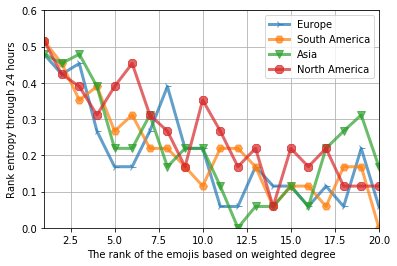

In [382]:

fig, ax = plt.subplots()
rootdir=os.getcwd()

## Instead of reading form a file we calculate the dictionary

# file_name=rootdir+'/data/all.hdf'
# df_info_1=pd.read_hdf(,'r')

criteria = ['_pr', '_bet', '_degree']

count =0

for key in continent_rak_entropy:
    numlist = continent_rak_entropy[key]
    if 'degree' in key:
        label = key.replace('_degree','')
        ## plot the corrent different
        ax.plot(range(1,21), numlist, markersize=8, linestyle=next(linestyles_c), marker=next(markers_c), linewidth=3, alpha=0.7, label=label)
        ax.set_ylim([0,0.6])
        ax.set_xlim([1,20])
        ax.legend()
        ax.grid(True)
        ax.set_xlabel('The rank of the emojis based on weighted degree')
        ax.set_ylabel('Rank entropy through 24 hours')
        count+=1
        plt.savefig("results/geo_diff/rank_entropy_degree.pdf")
        plt.savefig("results/geo_diff/rank_entropy_degree.jpg")


In [267]:
### Create the network for states and time 
### in the dataframe used here, everything is considered as string. So we convert the necessary things such as emoji list.

count_time=[]
state_dict = dict()
count=0
state_31_list = []
state_include=["Florida", "New York", "California", "New Jersey", "Massachusetts"]
emoji_list = create_emoji_List('emojiList_2300.txt')

def str_to_list_emoji(e_str):
    result = []
    e_str = e_str.replace('[','')
    e_str = e_str.replace(']','')
    e_str = e_str.replace(',',' ')
    result = e_str.split()
    return result

def network_builder_emoji_str(group_1, key_based, key_text, out_graphml, emoji_list, tag_s, tag_t):
    '''
    This function receives a data frame and it returns the graphml file of the network 
    created based on a key in it. 
    '''
    adjMat = np.zeros((len(emoji_list), len(emoji_list)), dtype = int) # The matrix containing the edges
    ## calculate the adjacency matrix
    counter=0
    for e,p in zip(group_1[1][key_based] , group_1[1][key_text]):
        mentioned_list=[]
        text_index=[]
        e_list = str_to_list_emoji(e)
        for emoji in e_list:
            mentioned_list.append(emoji_list.index(emoji))
        if len(mentioned_list)>1:
            adjMat = update_adj_matrix(adjMat, mentioned_list, p)
    ## create the network
    net = nx.from_numpy_matrix(adjMat, create_using=nx.DiGraph())
    net.edges(data=True)
    nx.write_graphml(net, 'results/cultural_diff/temp_{}_{}.graphml'.format(tag_s, tag_t))
    
#     np.savetxt('temp.txt', adjMat, fmt='%.18e', delimiter=',', newline='\n', header='')
#     g = ig.Graph.Read('temp.txt')
    g = ig.Graph.Read_GraphML('results/cultural_diff/temp_{}_{}.graphml'.format(tag_s, tag_t))
    g.vs['index'] = list(range(len(emoji_list)))
    g.vs['category'] = list_of_cat('all_emoji.csv')
    g.vs['unicode'] = list_of_emoji('all_emoji.csv')
    
    g.write_graphml(out_graphml)
    return g

for group_c in sorted(df_info.groupby(by='country_geo')):
    if group_c[0] == 'US':
        print type(group_c[1])
        df_g = pd.DataFrame.from_dict(group_c[1])
        for group_s in sorted(df_g.groupby(by='state_geo')): 
#             if group_s[0] in state_include:
            if len(group_s[1])>300:
                df_t = pd.DataFrame.from_dict(group_s[1])
                print group_s[0], len(group_s[1])
                for group_t in sorted(df_t.groupby(by='hour_local')):
                    print group_t[0], len(group_t[1])
                    count_time.append(len(group_t[1]))
                    ## make the dict and dataFrame for hours distribution
                    state_dict[group_t[0]] = len(group_t[1])
                    count +=1
                    file_graphml = 'results/cultural_diff/geo_net/{}_hour_{}.graphml'.format(group_s[0], group_t[0])
#                     net = network_builder_emoji_str(group_t, 'emoji_List','emoji_position_in_text', file_graphml, emoji_list, tag_s=group_s[0], tag_t=group_t[0])
                break

<class 'pandas.core.frame.DataFrame'>
California 1697
0 52
1 24
2 7
3 1
4 1
5 7
6 20
7 22
8 28
9 33
10 86
11 49
12 56
13 35
14 36
15 56
16 145
17 78
18 102
19 116
20 113
21 251
22 300
23 79


In [84]:
## run the state network analysis on all state networks
rootdir=os.getcwd()

## Generate the list of states with more than 50 tweets
state_list = []

# for group_c in sorted(df_info.groupby(by='country_geo')):
#     if group_c[0] == 'US':
#         df_g = pd.DataFrame.from_dict(group_c[1])
#         for group_s in sorted(df_g.groupby(by='state_geo')):
#             if len(group_s[1])>50:
#                 count +=1
#                 state_list.append(group_s[0])
                

count =0 ## To create the df file in the first try
for state in state_list:
    state_graph_file=rootdir+'/results/cultural_diff/geo_net/{}.graphml'.format(state)
    # Read the graphml
    g=nx.read_graphml(state_graph_file)
    
    # calculate the pagerank
    pr = nx.pagerank_numpy(g, alpha=0.9, weight='weight')
    # weight = nx.get_edge_attributes(g,'weight')
    ## create the dataframe from dictionary
    df_pr = pd.DataFrame.from_dict(pr, orient='index')
    ## change the name of the columns
    df_pr.columns = [state+'_pr']
    
    # betweennness centrality
    bet = nx.betweenness_centrality(g, normalized=True, weight='weight', endpoints=False)
    ## turn the dictionary to dataframe
    df_bet = pd.DataFrame.from_dict(bet, orient='index')
    ## change the name of the columns
    df_bet.columns = [state+'_bet']
    

    deg = g.degree(weight='weight')
    df_deg = pd.DataFrame.from_dict(deg, orient='index')
    ## change the name of the columns
    df_deg.columns = [state+'_degree']
    # deg_in = g.in_degree(weight='weight')
    # deg_out = g.out_degree(weight='weight')

    ## Merge dataframes
    # result = pd.concat([df_pr, df_bet, df_eig_in, df_eig_out], axis=1, join='inner')
    if count==0:
        ## Merge pagerank with betweenness (Just for the first time)
        result = pd.concat([df_pr, df_bet, df_deg], axis=1, join='inner')
        count+=1
    else:
        result = pd.concat([result, df_pr, df_bet, df_deg], axis=1, join='inner')

result.to_hdf('results/cultural_diff/node_geo_state_info.hdf', key='node_info', mode='w')
result.head(5)

,Alabama_pr,Alabama_bet,Alabama_degree,Arizona_pr,Arizona_bet,Arizona_degree,California_pr,California_bet,California_degree,Colorado_pr,...,Utah_degree,Virginia_pr,Virginia_bet,Virginia_degree,Washington_pr,Washington_bet,Washington_degree,Wisconsin_pr,Wisconsin_bet,Wisconsin_degree
n1007,0.000383,0.0,0.0,0.000354,0.0,0.0,0.00025,0.0,0.0,0.000406,...,0.0,0.000373,0.0,0.0,0.000386,0.0,0.0,0.000374,0.0,0.0
n2209,0.000383,0.0,0.0,0.000354,0.0,0.0,0.00025,0.0,0.0,0.000406,...,0.0,0.000373,0.0,0.0,0.000386,0.0,0.0,0.000374,0.0,0.0
n2208,0.000383,0.0,0.0,0.000354,0.0,0.0,0.00025,0.0,0.0,0.000406,...,0.0,0.000373,0.0,0.0,0.000386,0.0,0.0,0.000374,0.0,0.0
n2207,0.000383,0.0,0.0,0.000354,0.0,0.0,0.00025,0.0,0.0,0.000406,...,0.0,0.000373,0.0,0.0,0.000386,0.0,0.0,0.000374,0.0,0.0
n2206,0.000383,0.0,0.0,0.000354,0.0,0.0,0.00025,0.0,2.0,0.000406,...,0.0,0.000373,0.0,0.0,0.000386,0.0,0.0,0.000374,0.0,0.0


In [89]:
## Calculating the rank correlation between languages
result = pd.read_hdf('results/cultural_diff/node_geo_state_info.hdf', mode='r')
file_location ='results/cultural_diff/geo_cor/'
def corr_calculate(first, second):
    return first.corr(second, method="spearman") 

criteria = ['_pr', '_bet', '_degree']

state_cor_mat = np.zeros((len(state_list), len(state_list)), dtype = float)

for cri in criteria:
    for state_tuple in it.combinations(state_list, 2):
        ## Set the diagonal
        state_cor_mat[state_list.index(state_tuple[0])] [state_list.index(state_tuple[0])] = 1
        ## calculate the rank correlation
        cor = corr_calculate(result[state_tuple[0]+cri], result[state_tuple[1]+cri])
        state_cor_mat[state_list.index(state_tuple[0])][state_list.index(state_tuple[1])] = cor
        state_cor_mat[state_list.index(state_tuple[1])][state_list.index(state_tuple[0])] = cor
        
    np.save(file_location+'state_cor_{}.npy'.format(cri), state_cor_mat)

In [6]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

/Users/mehdimac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


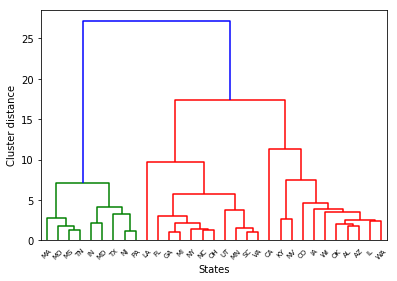

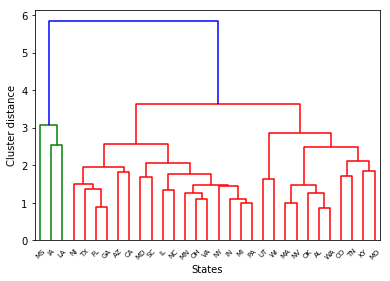

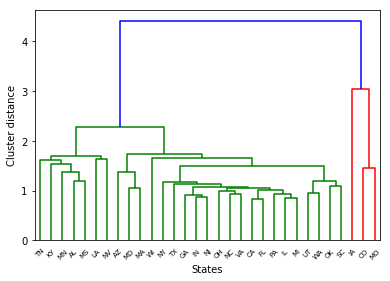

In [8]:
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as hierarchy

# df_info = pd.read_hdf('results/cultural_diff/all_geo.hdf', key='df_info')

count=0
SMALL_SIZE = 8

file_location ='results/cultural_diff/geo_cor/'
## Generate the list of states with more than 50 tweets
state_list = []

for group_c in sorted(df_info.groupby(by='country_geo')):
    if group_c[0] == 'US':
        df_g = pd.DataFrame.from_dict(group_c[1])
        for group_s in sorted(df_g.groupby(by='state_geo')):
            if len(group_s[1])>50:
                count +=1
                state_list.append(us_state_abbrev[group_s[0]])
## sata abbreviated list
## Criteria to compare
criteria = ['_pr', '_bet', '_degree']

# Methods = ['single', 'complete', 'average', 'weighted', 'centroid']
Methods = ['average']

for cri in criteria:

    corr_mat = np.load(file_location+'state_cor_{}.npy'.format(cri))


    corr_mat = 1- corr_mat


    pdist = distance.squareform(distance.pdist(corr_mat, 'sqeuclidean'))


    for method in Methods:
        Z = hierarchy.linkage(pdist, method=method)
        R = hierarchy.inconsistent(Z, d=2)
#         plt.rc('font' , size = 8)
        fig = plt.figure()
        ax = fig.add_axes([.15, .15, .8, .8])
        dd = hierarchy.dendrogram(Z, labels=state_list, leaf_font_size=7, ax=ax)
        ax.set_xlabel("States")
        ax.set_ylabel("Cluster distance")
        plt.gcf().subplots_adjust(bottom=0.15)
#         plt.savefig(file_location+'dend_{}_{}.pdf'.format(method, cri))

In [9]:
num_bins = 50
n, bins, patches = plt.hist(count_state, num_bins, facecolor='blue', alpha=0.5)
plt.show()
plt.savefig(file_location+'state_hist.png')


NameError: name 'count_state' is not defined